In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

11493376/11490434 [==============================] - 1s 0us/step
Epoch 1/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.9111 - accuracy: 0.7297 - val_loss: 0.4055 - val_accuracy: 0.8842
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3713 - accuracy: 0.8931 - val_loss: 0.3180 - val_accuracy: 0.9093
Epoch 3/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3163 - accuracy: 0.9091 - val_loss: 0.2929 - val_accuracy: 0.9165
Epoch 4/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2858 - accuracy: 0.9174 - val_loss: 0.2719 - val_accuracy: 0.9212
Epoch 5/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2636 - accuracy: 0.9235 - val_loss: 0.2452 - val_accuracy: 0.9284
Epoch 6/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2395 - accuracy: 0.9302 - val_loss: 0.2226 - val_accuracy: 0.9359
Epoch 7/10
2100/2100 [==============================] - 3s 1ms/step - l

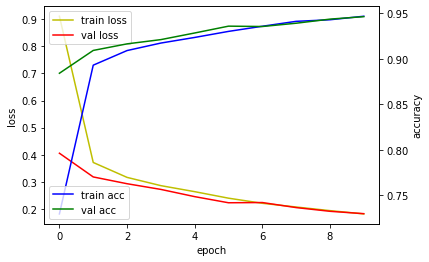

In [2]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화

# tf.data를 사용해서 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋 : 검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

# MNIST분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)

# 모델 정보 출력
model.summary()

# 모델 저장
model.save('mnist_model.h5')

# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

## 학습된 딥러닝 모델 사용하기

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.1885 - accuracy: 0.9444


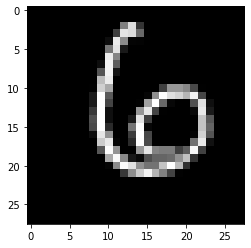

손글씨 이미지 예측값 :  [6]


In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화

# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)

# 테스트셋에서 100번째 이미지 출력
plt.imshow(x_test[100], cmap='gray')
plt.show()

# 테스트셋의 100번째 이미지 클래스 분류
picks = [100]
predict = model.predict_classes(x_test[picks])
print('손글씨 이미지 예측값 : ', predict)